# Naive Bayes baseline

In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
train_pd = pd.read_csv("train_2022.csv")
train_pd.head()

,Document,Sentence,population,intervention,background,outcome,study design,other,Text
0,145506,1,0,0,1,0,0,0,The rare liquor leakage syndrome with cranial ...
1,145506,2,0,0,1,0,0,0,This does not occur after a suboccipital punct...
2,145506,3,1,0,0,0,0,0,A report is given on three cases with differen...
3,145506,4,0,0,0,1,0,0,The prognosis of the eye-muscle paresis is good.
4,145506,5,0,0,0,1,0,0,Restitutio ad integrum resulted.


In [3]:
labels = ['population','intervention','background','outcome','study design','other']
label_counts = []
for l in labels:
    counts = train_pd[l].sum()
    label_counts.append(counts)
print(label_counts)

[584, 501, 1777, 3192, 167, 2424]


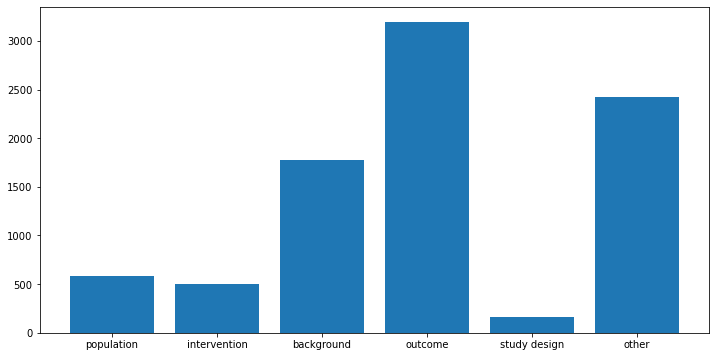

In [4]:
plt.figure(figsize=(12,6))
plt.bar(range(6), label_counts)
plt.xticks(range(6), labels)
plt.show()

In [5]:
n=len(train_pd)
n

8216

## Naive Bayes

The following code trains a separate Naive Bayes classifier for each label. 

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

labels = ['population','intervention','background','outcome','study design','other']
nb = dict()

tfidf = TfidfVectorizer(input='contents', max_features=10000)
train_tfidf = tfidf.fit_transform(train_pd['Text'])


for l in labels:
    nb[l] = MultinomialNB()
    nb[l].fit(train_tfidf, train_pd[l])
 

The following code applies the Naive Bayes models to the validation data, and saves the result in a CSV file for submission.

In [7]:
test_pd = pd.read_csv("val_2022.csv")
test_pd.head()

,Document,Sentence,population,intervention,background,outcome,study design,other,Text
0,2545507,1,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2545507,2,NaN,NaN,NaN,NaN,NaN,NaN,Field electrical stimulation elicited an incre...
2,2545507,3,NaN,NaN,NaN,NaN,NaN,NaN,2
3,2545507,4,NaN,NaN,NaN,NaN,NaN,NaN,"This efflux was: (a) reduced by clonidine, NA ..."
4,2545507,5,NaN,NaN,NaN,NaN,NaN,NaN,3


In [8]:
test_tfidf = tfidf.transform(test_pd['Text'])

for l in labels:
    test_probabilities = [p[1] for p in nb[l].predict_proba(test_tfidf)]
    test_pd[l] = test_probabilities
test_pd.head()

,Document,Sentence,population,intervention,background,outcome,study design,other,Text
0,2545507,1,0.071081,0.060979,0.216285,0.388510,0.020326,0.295034,1
1,2545507,2,0.051527,0.043599,0.291136,0.446462,0.006908,0.092019,Field electrical stimulation elicited an incre...
2,2545507,3,0.071081,0.060979,0.216285,0.388510,0.020326,0.295034,2
3,2545507,4,0.009718,0.018502,0.071952,0.689577,0.000747,0.033663,"This efflux was: (a) reduced by clonidine, NA ..."
4,2545507,5,0.071081,0.060979,0.216285,0.388510,0.020326,0.295034,3


In [9]:
test_pd.to_csv('nb_val_2022_probabilities.csv', index=False)

<AxesSubplot:>

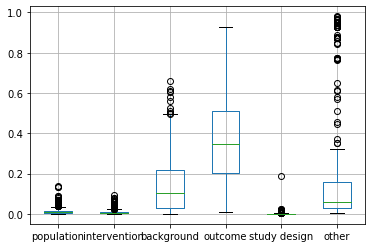

In [10]:
test_pd.boxplot(column=labels)

And here is for the test data

In [11]:
test_pd = pd.read_csv("test_2022.csv")
test_pd.head()

,Document,Sentence,population,intervention,background,outcome,study design,other,Text
0,1079261,1,NaN,NaN,NaN,NaN,NaN,NaN,The 14th myelographically demonstrated case of...
1,1079261,2,NaN,NaN,NaN,NaN,NaN,NaN,In most cases lumbosacral nerve root avulsion ...
2,1079261,3,NaN,NaN,NaN,NaN,NaN,NaN,This force causes nerve root avulsion in the i...
3,1079261,4,NaN,NaN,NaN,NaN,NaN,NaN,The myelographic defect is a pseudomeningocele...
4,1079261,5,NaN,NaN,NaN,NaN,NaN,NaN,Myelography clearly indicates nerve root avuls...


In [12]:
test_tfidf = tfidf.transform(test_pd['Text'])

for l in labels:
    test_probabilities = [p[1] for p in nb[l].predict_proba(test_tfidf)]
    test_pd[l] = test_probabilities
test_pd.head()

,Document,Sentence,population,intervention,background,outcome,study design,other,Text
0,1079261,1,0.016020,0.006747,0.144014,0.231104,0.000910,0.079992,The 14th myelographically demonstrated case of...
1,1079261,2,0.010115,0.009179,0.391942,0.219075,0.000392,0.029046,In most cases lumbosacral nerve root avulsion ...
2,1079261,3,0.023234,0.025979,0.286237,0.320242,0.002623,0.065535,This force causes nerve root avulsion in the i...
3,1079261,4,0.044821,0.103797,0.293155,0.324936,0.006119,0.204347,The myelographic defect is a pseudomeningocele...
4,1079261,5,0.025023,0.029721,0.255656,0.540710,0.004981,0.086470,Myelography clearly indicates nerve root avuls...


In [13]:
test_pd.to_csv('nb_test_2022_probabilities.csv', index=False)

<AxesSubplot:>

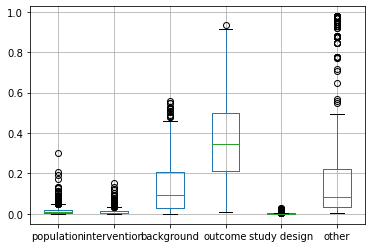

In [14]:
test_pd.boxplot(column=labels)